# La distribución normal

Las distribuciones normales se usan frecuentamente en las ciencias naturales y sociales para representar comportamientos aleatorios que no se conocen de antemano. 

**Ejercicio 1.-** Investigar fenómenos reales en donde se usa la distribución normal.

La forma de la distribución normal depende de dos parámetros que se calculan una vez dada una muestra de una población: $\mu$ y $\sigma^{2}$. Al parámetro $\mu$ lo llamaremos la *media* y al parámetro $\sigma^{2}$ lo llamaremos *varianza*.

A la realización del fenómeno aleatorio, lo denotaremos como $X$. Con estas notaciones, diremos que cierto fenómeno se distribuye de acuerdo a una variable aleatoria normal con parámetros $\mu$ y $\sigma^{2}$. Escribiremos,
$$X\sim N(\mu, \sigma^{2}).$$

Recordemos que, dado un conjunto de datos, podemos describir sus estadísticas a través de un histograma. Un resultado muy general afirma que existe una curva continua que aproxima a tales histogramas.

Tal curva (**la campana de Gauss-Bell**) es una función que depende de los parámetros $\mu$ y $\sigma^{2}$ y está dada por: 
$$f(x)=\frac{1}{\sigma \sqrt{2\pi}}\exp\left\{-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right\}$$
donde $x\in \mathbb{R}$. A la función $f$ la llamaremos *función de densidad de probabilidades*.

A continuación, veamos la forma de la función para distintos parámetros.

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

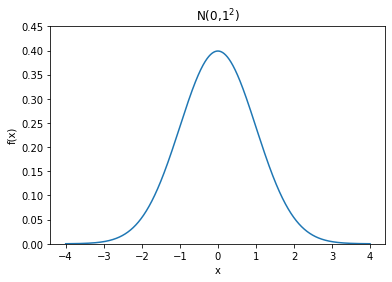

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

Propiedades de la función de densidad de probabilidades de una distribución normal:

1. Es positiva: $f(x)\geq 0$ para todo $x$ real.
2. Es continua y derivable en todas partes.
3. Es simétrica alrededor de $\mu$.
4. Conforme $x$ toma valores muy grandes de manera positiva y negativa, la función decrece hacia cero muy rápidamente.
5. Tiene un máximo global.
6. El área total bajo la curva es igual a $1$.

Veamos el comportamiento de la función conforme se cambia la varianza.

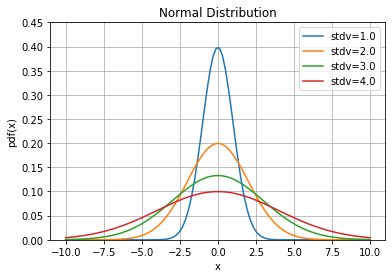

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

Veamos el comportamiento de la función conforme se cambia la media.

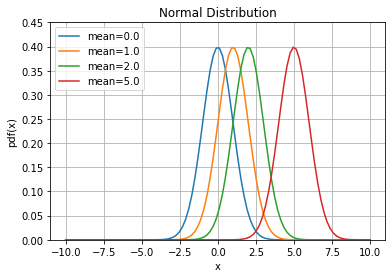

In [ ]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

## Función acumulativa de probabilidad.

Gracias a las propiedades anteriores, es posible calcular áreas delimitadas de la función $f$. Si $a$ y $b$ son reales cualesquiera, denotaremos por 
$$P(a\leq X\leq b),$$
la probabilidad de que $X$ esté en el intervalo $[a,b]$, al área bajo la curva de $f(x)$ sobre el intervalo $[a,b]$.

También, $P(X\leq x)$ denotara al área bajo la curva de la función $f(x)$ sobre el intervalo $(-\infty,x)$ y $P(X>x)$ denotara al área bajo la curva de la función $f(x)$ sobre el intervalo $(x, \infty)$. 

A la probabilidad $\text{cdf}(x):=P(X\leq x)$ se llama la distribución acumulativa (hasta el valor $x$) de $f(x)$.

Con la notación anterior,
$$P(a\leq X\leq b)=\text{cdf}(b)-\text{cdf}(a)$$
y
$$\text{sf}(a):=P(X>a)=1-\text{cdf}(a).$$

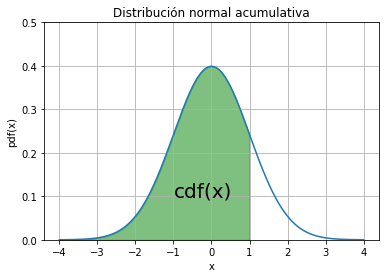

In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Distribución normal acumulativa")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

## Cálculo de probabilidades de una distribución normal

Calculemos $\text{cdf}(2)=P(X<2)$ cuando $X\sim N(3,2^2)$.

In [ ]:
from scipy.stats import norm
lessthan2=norm.cdf(x=2, loc=3, scale=2)
print(lessthan2)

0.3085375387259869


Vamos la gráfica:

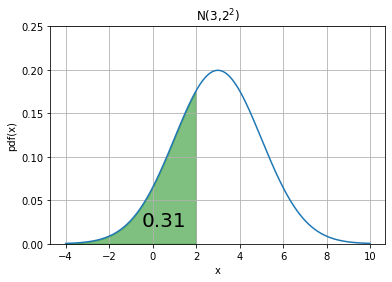

In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(lessthan2,2), fontsize=20)
plt.show()

Calculemos$𝑃(0.5<𝑋<2)$ cuando $X\sim N(1,2^2)$.

In [ ]:
norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)

0.2901687869569368

In [ ]:
s=np.sqrt(2)

In [ ]:
norm(1, s).cdf(2) - norm(1,s).cdf(0.5)

0.3984131339906417

In [ ]:
norm(0, 1).cdf(2.17) 

0.9849965770262678

Mostremos la gráfica:

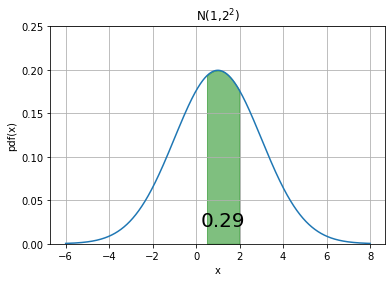

In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

Para calcular $𝑃(𝑋>4)$ cuando $X\sim N(3,2^2)$ usamos norm.sf(x=4, loc=3, scale=2).

In [ ]:
gr4sf=norm.sf(x=4, loc=3, scale=2)
gr4sf

0.3085375387259869

Grafiquemos.

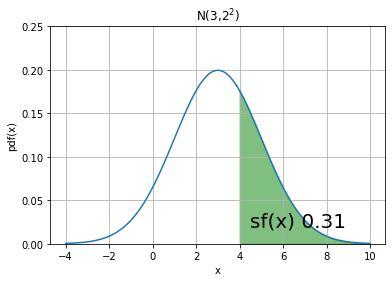

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
ax.text(4.5,0.02,"sf(x) %.2f" %(gr4sf), fontsize=20)
plt.show()

Comparemos gráficamente lo anterior.

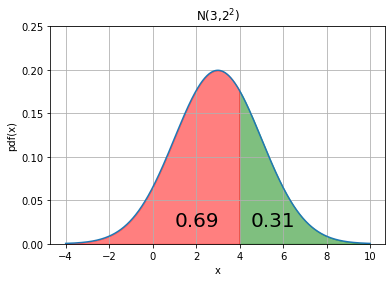

In [ ]:
gr4=norm.cdf(x=4, loc=3, scale=2)
gr14=1-gr4
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
px1=np.arange(-4,4,0.01)
ax.fill_between(px1,norm.pdf(px1,loc=3,scale=2),alpha=0.5, color='r')
ax.text(4.5,0.02,round(gr14,2), fontsize=20)
ax.text(1,0.02,round(gr4,2), fontsize=20)
plt.show()

## Ejercicios.

1.- Si $Z\sim N(0,1)$, encuentra $P(-1.93 < Z < 1.93)$.

**Solución.-** La probabilidad buscada es

In [ ]:
norm(0,1).cdf(1.93)-norm(0,1).cdf(-1.93)

0.9463931622458901

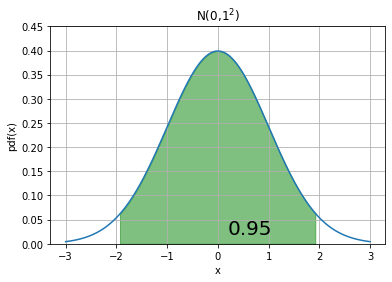

In [ ]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-3,3,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("N(0,$1^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-1.93,1.93,0.01)
ax.set_ylim(0,0.45)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='g')
pro=norm(0, 1).cdf(1.93) - norm(0,1).cdf(-1.93)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

2.- Las estaturas, en cm, de mujeres en cierto país están normalmente distribuídas con media $172$ cm y desviación estándar $5$ cm. Se selecciona un individuo de la población.

 Calcula la probabilidad de lo siguiente:

       (i) mida al menos 176 cm,

       (ii) que no sea mayor de 180 cm,

       (iii) entre 168 cm y 174 cm de altura.


**Solución.-**

Calculemos $P(X>176)$:

In [ ]:
norm.sf(x=176, loc=172, scale=5)

0.2118553985833967

Estandarizando: $P(Z>4/5)$ donde $Z\sim N(0,1)$.

In [ ]:
gr5sf=norm.sf(x=0.8, loc=0, scale=1)
gr5sf

0.2118553985833967

$P(X<180)$

In [ ]:
norm.cdf(x=176, loc=172, scale=5)

0.7881446014166034

$P(168<X<174)$

In [ ]:
norm(172,5).cdf(174)-norm(172,5).cdf(168)

0.4435663430269275

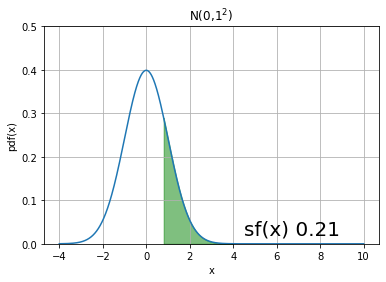

In [ ]:
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("N(0,$1^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.8,4,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='g')
ax.text(4.5,0.02,"sf(x) %.2f" %(gr5sf), fontsize=20)
plt.show()

## Solución a la Tarea y al Cuestionario 1

Importamos las librerías a usar

In [ ]:
from scipy.stats import bernoulli, binom
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sympy 
from sympy.abc import x, z 

1. Se lanzan $1000$ monedas con la siguiente distribución:
	$$\mathbb{P}(X(\text{sol})=1)=0.3, \ \ \mathbb{P}(X(\text{águila})=0)=0.7.$$
    
    Sea $Y$ la variable aleatoria que representa el número de soles que se obtienen en los     $1000$ lanzamientos. Usando el TCL, estima las siguientes probabilidades:

	- $\mathbb{P}(Y>50)$.
	- $\mathbb{P}(100<Y<300)$.
	- $\mathbb{P}(Y>400)$.


En primer lugar, calculamos la media y varianza conforme a los datos:

- $E[Y]=1000(0.3)=300$

- $Var[Y]=1000(0.3)(0.7)=210$

In [ ]:
(50-300)/(210**0.5)

-17.251638983558856

Normalizando, se tiene que 
$$\mathbb{P}(Y>50)=\mathbb{P}(Z>-17.25)$$
en donde $Z\sim N(0,1)$.

Usando los códigos anteriores, la probabilidad buscada es:

In [ ]:
p50 = norm.sf(x=-17, loc=0, scale=1)

p50

1.0

También, sin usar aproximación, podemos calcular lo que se pide

In [ ]:
p50 = binom.sf(50, 1000, 0.3)
p50

0.9999999999999999

Realicemos una simulación de lo anterior

In [ ]:
#Vamos a crear una matriz cuyod elementos registren el resultados de volados 
#aguila = 0 y sol = 1

df1000 = pd.DataFrame()

for i in range (1,11): #se lanza 10 veces, el número de muestras 
    volados_muestra = np.random.binomial(1000, 0.3, 10) #lanzamiento de 1 moneda, que sea justa y aventamos 1000 veces 
    col = f"muestra {i}"
    df1000[col]=volados_muestra

df1000.head()

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10
0,290,293,285,321,303,358,294,296,297,293
1,313,308,290,308,302,297,308,298,310,289
2,274,303,296,294,290,302,278,299,286,318
3,295,291,282,291,303,305,307,282,292,297
4,300,300,297,305,328,294,304,313,282,303


In [ ]:
df1000_medias = pd.DataFrame(df1000.mean(), columns = ["muestra de medias"])
df1000_medias

,muestra de medias
muestra 1,297.4
muestra 2,299.9
muestra 3,297.4
muestra 4,300.2
muestra 5,308.4
muestra 6,301.7
muestra 7,297.5
muestra 8,293.2
muestra 9,297.5
muestra 10,303.1


In [ ]:
df1000_medias.describe().iloc[1]

muestra de medias    299.63
Name: mean, dtype: float64

Efectivamente, la media poblacional es un MLE. 

<AxesSubplot:>

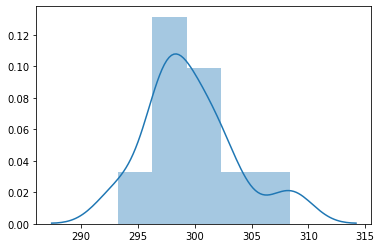

In [ ]:
import seaborn as sns
sns.distplot(df1000_medias)

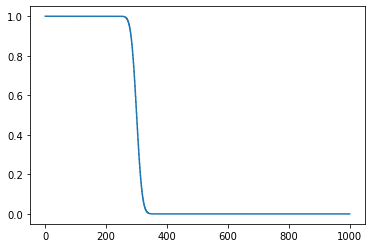

In [ ]:
# Podemos visualizar la función P(Y>50)

x = np.arange(0, 1000, 0.01)
   
y = 1-binom.cdf(x, 1000, 0.3)
   
plt.plot(x, y) 
plt.show()

Continuemos con el cálculo de $\mathbb{P}(100<Y<300)$.

In [ ]:
(100-300)/(210**0.5)

-13.801311186847085

Note que:
    $$\mathbb{P}(100<Y<300)=\mathbb{P}(-13.8<Z<0)$$
con $Z\sim N(0,1)$.

In [ ]:
p100_300 = norm(0,1).cdf(0)-norm(0,1).cdf(-13.8)
p100_300

0.5

Continuemos con el cálculo de $\mathbb{P}(Y>400)$.

In [ ]:
(400-300)/(210**0.5)

6.900655593423543

In [ ]:
p400 = norm.sf(x=6.9, loc=0, scale=1)

p400

2.600126965638173e-12

2. Un banco de inversión está administrando mil millones de dólares, que invierte en varios instrumentos financieros ("activos") relacionados con el mercado de la vivienda (por ejemplo, los  "valores respaldados por hipotecas"). Debido a que el banco está invirtiendo con dinero prestado, sus activos reales son solo 50 millones (5$\%$). En consecuencia, si el banco pierde más del 5$\%$, se vuelve insolvente (lo que significa que tendrá que ser rescatado, y los banqueros pueden tener que renunciar a grandes bonos durante unos meses). 
	
    a. El banco considera invertir en un solo activo, cuya ganancia (durante un período de 1 año y medida en puntos porcentuales) se modela como una variable aleatoria normal $R$, con media 7 y desviación estándar 10. (Es decir , se espera que el activo produzca una ganancia del 7$\%$.) ¿Cuál es la probabilidad de que el banco se vuelva insolvente? ¿Aceptaría usted este nivel de riesgo?

    b. Para salvaguardar su posición, el banco decide diversificar sus inversiones, considera invertir 50 millones en cada uno de veinte activos diferentes, teniendo el i-ésimo una ganancia $R_i$, que nuevamente es normal con media 7 y desviación estándar 10 La ganancia del banco será $(R_1 + \cdots + R_{20}) / 20$. Estos veinte activos se eligen para reflejar los sectores inmobiliarios en diferentes estados o incluso países, y los científicos del banco eligen modelar cada $R_i$ como variables aleatorias independientes. Según este modelo, ¿cuál es la probabilidad de que el banco sea insolvente?

Para el primer inciso, $R\sim N(7,100)$. Queremos calcular $\mathbb{P}(R<-5)$. Esto podemos hacerlo usando los cálculos anteriores

In [ ]:
pR = norm.cdf(x=-5, loc=7, scale=10)
pR

0.11506967022170822

Para el segundo inciso, cada $R_{i}\sim N(7,100)$. Así, 
- $\mathbb{E}[R]=7$ y
- $Var[R]=5$

In [ ]:
pR = norm.cdf(x=-5, loc=7, scale=5**(0.5))
pR

4.012555633463782e-08

### Quiz 1

El tiempo que se necesita para completar una tarea específica en una fábrica. 



Para estimar la media y la varianza observamos una muestra aleatoria (en minutos): 18,21,17,16,24,20.

Encuentre los valores de la media muestral, la varianza muestral y la desviación estándar muestral para la muestra observada.

In [ ]:
muestra = np.array([18, 21, 17, 16, 24, 20])

print("media:"+ str(muestra.mean()), "varianza:"+ str(muestra.var()), "desviación:"+ str(muestra.std()) )

media:19.333333333333332 varianza:7.222222222222221 desviación:2.6874192494328497


Se tiene una variable aleatoria Binomial con parámetro 3 y $\theta$, en dónde $\theta$  es un parámetro desconocido. 

1.- ¿Qué representa la variable aleatoria?

2.- Se tiene una muestra (1, 3, 2, 2). Con estos datos, ¿cómo aproximarías el valor de  $\theta$?

In [ ]:
p = sympy.symbols("p", positive = True)

In [ ]:
from sympy import Symbol, Rational, binomial, expand_func

n = Symbol('n', integer=True, positive=True)

Creamos la función log-verosimil:
    $$L(1, 3, 2, 2; \theta)=\binom{3}{1}\binom{3}{3}\binom{3}{2}\binom{3}{2}\theta^{8}(1-\theta)^{4}.$$

In [ ]:
L = binomial(3, 1)*binomial(3, 3)*binomial(3, 2)*binomial(3, 2)*p**8*(1-p)**4

L

27*p**8*(1 - p)**4

In [ ]:
logL = sympy.expand_log(sympy.log(L))

logL

8*log(p) + log((1 - p)**4) + 3*log(3)

In [ ]:
phat = sympy.solve(sympy.diff(logL,p),p)[0]

phat

2/3